# ROC CURVES (binary)

In [57]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Carica Decision Tree
y_true_dt = np.load('y_true_dt_binary.npy')
y_score_dt = np.load('y_scores_dt_binary.npy')

# Carica Naive Bayes
y_true_nb = np.load('y_true_nb_binary.npy')
y_score_nb = np.load('y_scores_nb_binary.npy')

# Carica KNN
y_true_knn = np.load('y_true_knn_binary.npy')
y_score_knn = np.load('y_scores_knn_binary.npy')

In [58]:
# # #Calcola la macro-average ROC per ciascun modello >>>>>>>>>>>> MULTICLASS
# # from sklearn.preprocessing import label_binarize
# # from sklearn.metrics import roc_curve, auc

# # def compute_macro_roc(y_true, y_score, classes):
# #     y_true_bin = label_binarize(y_true, classes=classes)
# #     fpr = dict()
# #     tpr = dict()
# #     for i in range(len(classes)):
# #         fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
# #     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
# #     mean_tpr = np.zeros_like(all_fpr)
# #     for i in range(len(classes)):
# #         mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
# #     mean_tpr /= len(classes)
# #     return all_fpr, mean_tpr, auc(all_fpr, mean_tpr)



# def compute_macro_roc(y_true, y_score, classes):
#     y_true_bin = label_binarize(y_true, classes=classes)
#     fpr = dict()
#     tpr = dict()
#     for i in range(len(classes)):
#         fpr[i], tpr[i], _ = roc_curve(y_true_bin[:,1], y_score[:,1])
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(len(classes)):
#         mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
#     mean_tpr /= len(classes)
#     return all_fpr, mean_tpr, auc(all_fpr, mean_tpr)

In [59]:
def compute_macro_roc(y_true, y_score):
    # y_score deve essere un array di probabilità per la classe positiva (1)
    fpr, tpr, _ = roc_curve(y_true, y_score)  #tolto -> usa la colonna della classe positiva
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

In [60]:
# #4. Plotta tutte le curve nel ROC_CURVE notebook:
# import matplotlib.pyplot as plt

# fpr_knn, tpr_knn, auc_knn = compute_macro_roc(y_true_knn, y_score_knn, classes=[0, 1])
# fpr_nb, tpr_nb, auc_nb = compute_macro_roc(y_true_nb, y_score_nb, classes=[0, 1])
# fpr_dt, tpr_dt, auc_dt = compute_macro_roc(y_true_dt, y_score_dt, classes=[0, 1])


# plt.figure(figsize=(8,6))
# # plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
# plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
# plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')

# plt.title('Macro-average ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.grid(True)
# plt.show()

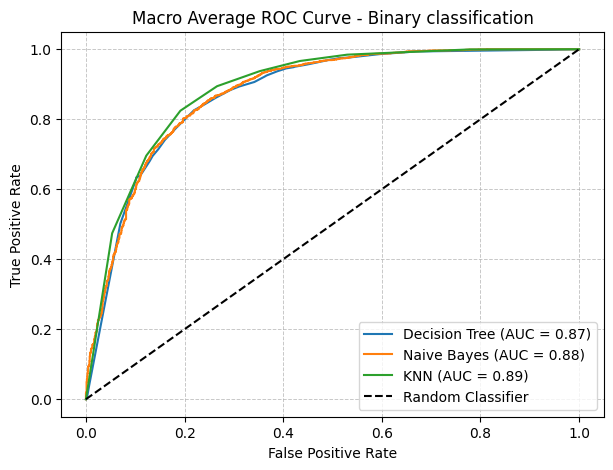

In [71]:
import matplotlib.pyplot as plt

# Calcola ROC per ciascun classificatore binario
fpr_knn, tpr_knn, auc_knn = compute_macro_roc(y_true_knn, y_score_knn)
fpr_nb, tpr_nb, auc_nb = compute_macro_roc(y_true_nb, y_score_nb)
fpr_dt, tpr_dt, auc_dt = compute_macro_roc(y_true_dt, y_score_dt)

# Plot delle curve
plt.figure(figsize=(7,5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title('Macro Average ROC Curve - Binary classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True, alpha=0.7, linestyle='--', linewidth=0.7)
plt.show()
